<a href="https://colab.research.google.com/github/jithesh9539/Alternus_Veras_Assignment_NLP/blob/main/Jithesh_Allternus_Veras_Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
!pip install sidetable -U
!pip install nltk
!pip install gensim
!pip install textract
!pip install GoogleNews
!pip install newspaper3k

     |████████████████████████████████| 103 kB 7.0 MB/s 
     |████████████████████████████████| 32.8 MB 1.3 MB/s 
     |████████████████████████████████| 106 kB 41.6 MB/s 
     |████████████████████████████████| 10.1 MB 21.6 MB/s 
     |████████████████████████████████| 69 kB 6.0 MB/s 
     |████████████████████████████████| 5.6 MB 29.7 MB/s 
     |████████████████████████████████| 2.0 MB 41.8 MB/s 
     |████████████████████████████████| 128 kB 67.7 MB/s 
     |████████████████████████████████| 73 kB 2.2 MB/s 
     |████████████████████████████████| 112 kB 50.2 MB/s 
     |████████████████████████████████| 149 kB 51.5 MB/s 
     |████████████████████████████████| 70 kB 7.5 MB/s 
     |████████████████████████████████| 339 kB 55.2 MB/s 
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3980 sha256=a9a750a7b47148219ff0edeb6ba0b78e9567919daf49d50b4eadc21861fafd5e
  Stored in directory: /root/.cache/pip/wheels/b7/20/b2/473e3aea9a0c0d3e7b2f7bd81d06d0794fec12752733d

     |████████████████████████████████| 288 kB 5.1 MB/s 
     |████████████████████████████████| 211 kB 5.1 MB/s 
     |████████████████████████████████| 87 kB 6.0 MB/s 
     |████████████████████████████████| 81 kB 8.8 MB/s 
     |████████████████████████████████| 7.4 MB 1.1 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13553 sha256=a60da32342cfdb8616ca935a4240691a747de7ef46776ad889532a333b341791
  Stored in directory: /root/.cache/pip/wheels/df/67/41/faca10fa501ca010be41b49d40360c2959e1c4f09bcbfa37fa
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3357 sha256=e7aafb5b92cd3e458c4e67b2337586cb0db35ead66661223c4daee8a9950ad4c
  Stored in directory: /root/.cache/pip/wheels/7f/d4/8f/6e2ca54744c9d7292d88ddb8d42876bcdab5e6d84a21c10346
  Created wheel for jieba3k: filename=jieba3k-0.35.1-py3-none-any.whl size=7398404 sha256=da885994f31e18da25202d684a4a37dfa794c6dff0a11351953d701c123b531a
  Stored in directory: /roo

In [62]:
# importing libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from string import punctuation
import string
import seaborn as sns
from sklearn.manifold import TSNE

import gensim
import re
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')


from scipy import sparse
from textract import process
from wordcloud import WordCloud, STOPWORDS
from gensim.models import word2vec

import sqlite3

import requests
from bs4 import BeautifulSoup

import csv

try:
  from urllib.request import urlopen
except ImportError:
  from urllib2 import urlopen

import pickle

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Data Ingestion**

In [124]:
!wget -P /content/drive/MyDrive/ML-Spring-2022/DataMarvels/Alternus_Veras/Jithesh_Alternus_Vera/ https://news.yahoo.com/us/

--2022-04-29 20:16:31--  https://news.yahoo.com/us/
Resolving news.yahoo.com (news.yahoo.com)... 74.6.143.18, 2001:4998:124:1507::a000
Connecting to news.yahoo.com (news.yahoo.com)|74.6.143.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/content/drive/MyDrive/ML-Spring-2022/DataMarvels/Alternus_Veras/Jithesh_Alternus_Vera/index.html’

index.html              [ <=>                ]   1.07M  5.59MB/s    in 0.2s    

2022-04-29 20:16:32 (5.59 MB/s) - ‘/content/drive/MyDrive/ML-Spring-2022/DataMarvels/Alternus_Veras/Jithesh_Alternus_Vera/index.html’ saved [1117944]



In [125]:
# News from Latest News section
!wget -P /content/drive/MyDrive/ML-Spring-2022/DataMarvels/Alternus_Veras/Jithesh_Alternus_Vera/ https://news.yahoo.com

--2022-04-29 20:16:35--  https://news.yahoo.com/
Resolving news.yahoo.com (news.yahoo.com)... 74.6.143.18, 2001:4998:124:1507::a000
Connecting to news.yahoo.com (news.yahoo.com)|74.6.143.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/content/drive/MyDrive/ML-Spring-2022/DataMarvels/Alternus_Veras/Jithesh_Alternus_Vera/index.html.1’

index.html.1            [ <=>                ]   1.11M  5.81MB/s    in 0.2s    

2022-04-29 20:16:35 (5.81 MB/s) - ‘/content/drive/MyDrive/ML-Spring-2022/DataMarvels/Alternus_Veras/Jithesh_Alternus_Vera/index.html.1’ saved [1163165]



**Scraping the articles**

In [126]:
headlines = []
sources = []
previews = []
urls = []
articleUrls = []

In [127]:
def get_news(fileName):
  file = open(fileName.format(3),'r')
  html = file.read()
  soup = BeautifulSoup(html, "html.parser")
  # get title
  for title in soup.find_all('h3'):
    if(title.find("a")):
      headlines.append(title.find("a").getText())
      for url in title.find_all("a"):
        u = title.find("a", href=True).get('href')
        if (re.search(".html",u) and u.startswith("/")):
          urls.append(u)
        else:
          urls.append("No link")
  

  # get source name
  for source in soup.find_all('div', attrs={"class":"C(#959595) Fz(12px) Fw(500) Lh(1.33) C(#6e7780)! D(ib) Mb(6px)"}):
    if(len(source.getText()) > 0 ):
      sources.append(source.getText())
    else:
      sources.append("No Source")
  

  #string = 'https://news.yahoo.com'
  #for url in urls:
    #url = string + url
    #articleUrls.append(url)
  

In [128]:
get_news('/content/drive/MyDrive/ML-Spring-2022/DataMarvels/Alternus_Veras/Jithesh_Alternus_Vera/index.html')
get_news('/content/drive/MyDrive/ML-Spring-2022/DataMarvels/Alternus_Veras/Jithesh_Alternus_Vera/index.html.1')

In [129]:
print("headline count: ", len(headlines))
print("source count: ", len(sources))
print("url count: ", len(urls))

headline count:  50
source count:  50
url count:  50


In [131]:
df_news = pd.DataFrame(columns = ['headlines', 'sources', 'articleUrls'])
df_news['headlines'] = headlines
df_news['sources'] = sources
df_news['articleUrls'] = urls

In [132]:
df_news.head()

,headlines,sources,articleUrls
0,St. Cloud man charged following incident in which he was shot in the leg,SC Cloud | St. Cloud Times,/st-cloud-man-charged-following-200937550.html
1,Pfizer's vaccines head Kathrin Jansen to retire this year,Reuters,/pfizers-vaccines-head-kathrin-jansen-200519779.html
2,Kewanee police: 66-year-old resident killed by own dog,Star-Courier,/kewanee-police-66-old-resident-200319439.html
3,Atlanta woman caught red-handed breaking into car in broad daylight in front of police,WSB Cox articles,/atlanta-police-arrest-woman-she-032258641.html
4,St. Paul man charged with stealing the same SUV twice and setting three fires sentenced to four years in prison,"Pioneer Press, St. Paul, Minn.",/st-paul-man-charged-stealing-200000450.html


In [133]:
print('Duplicate rows',(df_news.duplicated()).sum())

Duplicate rows 0


In [134]:
df_news

,headlines,sources,articleUrls
0,St. Cloud man charged following incident in which he was shot in the leg,SC Cloud | St. Cloud Times,/st-cloud-man-charged-following-200937550.html
1,Pfizer's vaccines head Kathrin Jansen to retire this year,Reuters,/pfizers-vaccines-head-kathrin-jansen-200519779.html
2,Kewanee police: 66-year-old resident killed by own dog,Star-Courier,/kewanee-police-66-old-resident-200319439.html
3,Atlanta woman caught red-handed breaking into car in broad daylight in front of police,WSB Cox articles,/atlanta-police-arrest-woman-she-032258641.html
4,St. Paul man charged with stealing the same SUV twice and setting three fires sentenced to four years in prison,"Pioneer Press, St. Paul, Minn.",/st-paul-man-charged-stealing-200000450.html
5,"Ravenna men charged with raping 10-year-old girls in separate, unrelated cases",Record-Courier,/ravenna-men-charged-raping-10-195621602.html
6,"York County woman conspired with husband, son to fake death in Ukraine for money, cops say",York Daily Record,/york-county-woman-conspired-husband-195559990.html
7,"Missing Haledon man was spotted near Paterson park on night he disappeared, police say",The Bergen Record,/missing-haledon-man-spotted-near-194930569.html
8,Man and woman stabbed in central Fresno. What police investigators know so far,Fresno Bee,/man-woman-stabbed-central-fresno-194857253.html
9,Cameras showed man was shot outside Dollar General in Georgia — but then he vanished,Columbus Ledger-Enquirer,/cameras-showed-man-shot-outside-194606241.html


In [136]:
df_news.to_csv('/content/drive/MyDrive/ML-Spring-2022/DataMarvels/Alternus_Veras/Jithesh_Alternus_Vera/yahoo_news.csv', encoding='utf-8')

In [137]:
df_news_yahoo = pd.read_csv('/content/drive/MyDrive/ML-Spring-2022/DataMarvels/Alternus_Veras/Jithesh_Alternus_Vera/yahoo_news.csv')

In [138]:
df_news_yahoo

,Unnamed: 0,headlines,sources,articleUrls
0,0,St. Cloud man charged following incident in which he was shot in the leg,SC Cloud | St. Cloud Times,/st-cloud-man-charged-following-200937550.html
1,1,Pfizer's vaccines head Kathrin Jansen to retire this year,Reuters,/pfizers-vaccines-head-kathrin-jansen-200519779.html
2,2,Kewanee police: 66-year-old resident killed by own dog,Star-Courier,/kewanee-police-66-old-resident-200319439.html
3,3,Atlanta woman caught red-handed breaking into car in broad daylight in front of police,WSB Cox articles,/atlanta-police-arrest-woman-she-032258641.html
4,4,St. Paul man charged with stealing the same SUV twice and setting three fires sentenced to four years in prison,"Pioneer Press, St. Paul, Minn.",/st-paul-man-charged-stealing-200000450.html
5,5,"Ravenna men charged with raping 10-year-old girls in separate, unrelated cases",Record-Courier,/ravenna-men-charged-raping-10-195621602.html
6,6,"York County woman conspired with husband, son to fake death in Ukraine for money, cops say",York Daily Record,/york-county-woman-conspired-husband-195559990.html
7,7,"Missing Haledon man was spotted near Paterson park on night he disappeared, police say",The Bergen Record,/missing-haledon-man-spotted-near-194930569.html
8,8,Man and woman stabbed in central Fresno. What police investigators know so far,Fresno Bee,/man-woman-stabbed-central-fresno-194857253.html
9,9,Cameras showed man was shot outside Dollar General in Georgia — but then he vanished,Columbus Ledger-Enquirer,/cameras-showed-man-shot-outside-194606241.html


In [139]:
df_news_yahoo.drop(columns='Unnamed: 0', axis=1, inplace=True)
df_news_yahoo.head()

,headlines,sources,articleUrls
0,St. Cloud man charged following incident in which he was shot in the leg,SC Cloud | St. Cloud Times,/st-cloud-man-charged-following-200937550.html
1,Pfizer's vaccines head Kathrin Jansen to retire this year,Reuters,/pfizers-vaccines-head-kathrin-jansen-200519779.html
2,Kewanee police: 66-year-old resident killed by own dog,Star-Courier,/kewanee-police-66-old-resident-200319439.html
3,Atlanta woman caught red-handed breaking into car in broad daylight in front of police,WSB Cox articles,/atlanta-police-arrest-woman-she-032258641.html
4,St. Paul man charged with stealing the same SUV twice and setting three fires sentenced to four years in prison,"Pioneer Press, St. Paul, Minn.",/st-paul-man-charged-stealing-200000450.html


In [140]:
df_news_yahoo['sources'].unique()

array(['SC Cloud | St. Cloud Times', 'Reuters', 'Star-Courier',
       'WSB Cox articles', 'Pioneer Press, St. Paul, Minn.',
       'Record-Courier', 'York Daily Record', 'The Bergen Record',
       'Fresno Bee', 'Columbus Ledger-Enquirer', 'Herald-Tribune',
       'Beaver County Times', 'Lansing State Journal', 'WHBQ',
       'Kansas City Star', 'The Times-Reporter', 'Tacoma News Tribune',
       'LA Times', 'The Standard-Times', 'Las Cruces Sun-News',
       'Associated Press', 'Biloxi Sun Herald', 'The State', 'Yahoo Life',
       'Business Insider', 'Popular Mechanics', 'In The Know by Yahoo',
       'E! News', 'The Daily Beast', 'American City Business Journals',
       'Quartz', 'Fox News', 'NextShark', 'CBS News Videos',
       'Modesto Bee', 'BGR', 'HuffPost', 'Autoblog',
       'Fort Worth Star-Telegram', 'The Week', 'The Wrap', 'AccuWeather'],
      dtype=object)

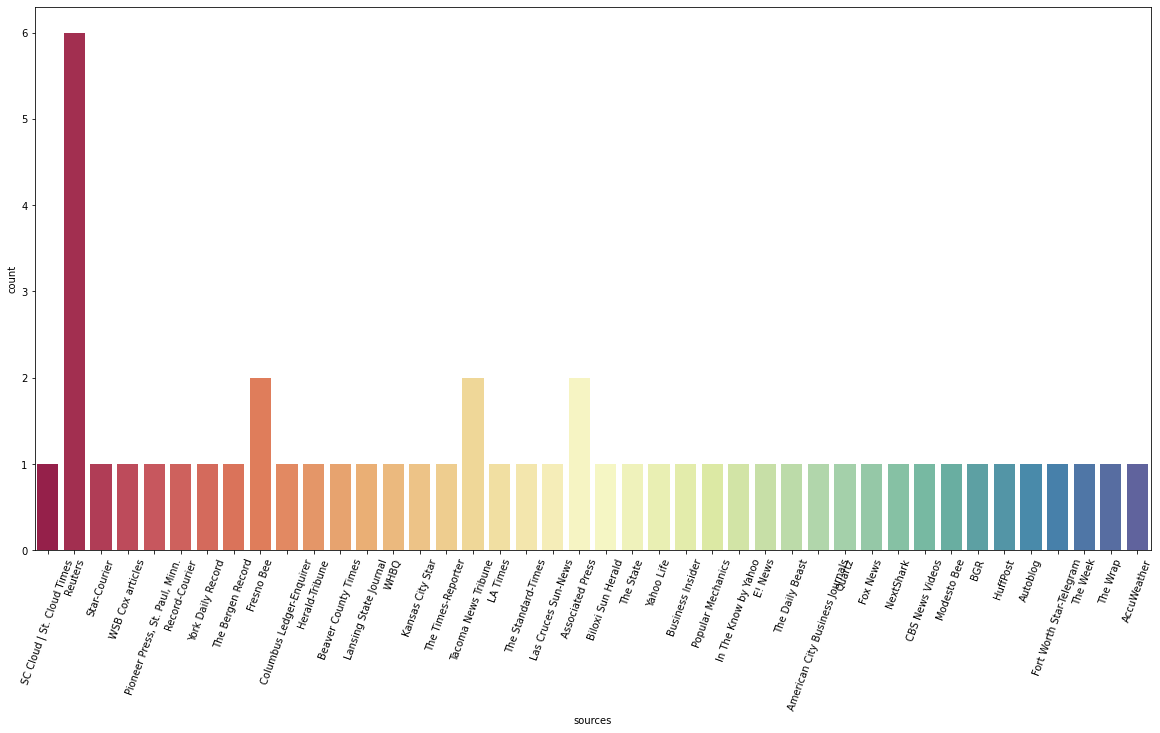

In [141]:
# Visualization of articles count 
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x=df_news_yahoo['sources'], palette='Spectral')
ax.tick_params('x', rotation=70)
plt.show()

**In the above plot we can see the article counts for various sources from yahoo news website**

In [144]:
data_reliable=pd.read_csv('/content/drive/MyDrive/ML-Spring-2022/DataMarvels/Alternus_Veras/Jithesh_Alternus_Vera/df_reliable_source_score.csv')

In [145]:
data_reliable.head()

,Unnamed: 0,source,count,"Wikipedia, is_fake","NewsGuard, overall_class",Politifact_label,reliable_source
0,0,The Sun,43613,NaN,NaN,NaN,1
1,1,The Telegraph,33763,NaN,NaN,NaN,1
2,2,theRussophileorg,31842,NaN,NaN,NaN,1
3,3,Sputnik,30372,NaN,0.0,NaN,0
4,4,New York Post,25407,NaN,1.0,1.0,1


In [146]:
data_reliable_source = data_reliable.drop('Unnamed: 0', axis=1)

In [148]:
def getReliableSourceScore(df, source): # return between 0 and 1, being 0 = UnReliable,  1 = Reliable
    source = df[source]
    if (source == ""):
        return 0
    d = data_reliable[data_reliable['source'].str.match(source)]
    if (d['reliable_source'].empty):
        return 0
    return int(d['reliable_source'].values)

In [149]:
df_news_yahoo['reliable_source'] = df_news.apply(getReliableSourceScore,axis=1, source='sources')

In [151]:
df_news_yahoo.head()


,headlines,sources,articleUrls,reliable_source
0,St. Cloud man charged following incident in which he was shot in the leg,SC Cloud | St. Cloud Times,/st-cloud-man-charged-following-200937550.html,0
1,Pfizer's vaccines head Kathrin Jansen to retire this year,Reuters,/pfizers-vaccines-head-kathrin-jansen-200519779.html,1
2,Kewanee police: 66-year-old resident killed by own dog,Star-Courier,/kewanee-police-66-old-resident-200319439.html,0
3,Atlanta woman caught red-handed breaking into car in broad daylight in front of police,WSB Cox articles,/atlanta-police-arrest-woman-she-032258641.html,0
4,St. Paul man charged with stealing the same SUV twice and setting three fires sentenced to four years in prison,"Pioneer Press, St. Paul, Minn.",/st-paul-man-charged-stealing-200000450.html,0


**Adding Politifact dataset**

In [152]:
df_fakenewssites=pd.read_csv('/content/drive/MyDrive/ML-Spring-2022/DataMarvels/Alternus_Veras/Jithesh_Alternus_Vera/data.csv')

In [154]:
df_fakenewssites.head()

,Site name,Type of site,Registration
0,16WMPO.com,Imposter site,"Scottsdale, Ariz. **"
1,24online.news,Imposter site,"Panama, Pa. **"
2,24wpn.com,Fake news,"Veles, Macedonia"
3,24x365live.com,Fake news,"Kobenhavn, Denmark"
4,247NewsMedia.com,Fake news,"Kumanovo, Macedonia"


In [155]:
print(df_fakenewssites['Type of site'].unique())

['Imposter site' 'Fake news' 'Parody site' 'fake news' 'Some fake stories'
 'some fake stories']


In [156]:
df_fakenewssites['Type of site'] = df_fakenewssites['Type of site'].str.lower()
df_fakenewssites

,Site name,Type of site,Registration
0,16WMPO.com,imposter site,"Scottsdale, Ariz. **"
1,24online.news,imposter site,"Panama, Pa. **"
2,24wpn.com,fake news,"Veles, Macedonia"
3,24x365live.com,fake news,"Kobenhavn, Denmark"
4,247NewsMedia.com,fake news,"Kumanovo, Macedonia"
...,...,...,...
322,World.Politics.com,fake news,"Fort Lauderdale, FL"
323,WorldTruth.tv,fake news,GoDaddy**
324,WRPM33.com,imposter site,GoDaddy**
325,WY21news.com,imposter site,GoDaddy**


In [157]:
print(df_fakenewssites['Type of site'].unique())

['imposter site' 'fake news' 'parody site' 'some fake stories']


All the sources in this dataset are marked with some kind of fake tag.

Using these, creating a fake score column to attach a fake score of 0, 0.5 and 1.

In [158]:
for index, row in df_fakenewssites.iterrows():
    score = 1
    if (row['Type of site'] == 'some fake stories'):
        score = 0.5
    df_fakenewssites.at[index, 'fake_score'] = score

df_fakenewssites.head()

,Site name,Type of site,Registration,fake_score
0,16WMPO.com,imposter site,"Scottsdale, Ariz. **",1.0
1,24online.news,imposter site,"Panama, Pa. **",1.0
2,24wpn.com,fake news,"Veles, Macedonia",1.0
3,24x365live.com,fake news,"Kobenhavn, Denmark",1.0
4,247NewsMedia.com,fake news,"Kumanovo, Macedonia",1.0


In [159]:
df_fakenewssites.to_csv('/content/drive/MyDrive/ML-Spring-2022/DataMarvels/Alternus_Veras/Jithesh_Alternus_Vera/data_politifact_newsSites.csv', index=False)

In [172]:
df_fakenewssites=pd.read_csv('/content/drive/MyDrive/ML-Spring-2022/DataMarvels/Alternus_Veras/Jithesh_Alternus_Vera/data_politifact_newsSites.csv')

In [173]:
df_fakenewssites.head()

,Site name,Type of site,Registration,fake_score
0,16WMPO.com,imposter site,"Scottsdale, Ariz. **",1.0
1,24online.news,imposter site,"Panama, Pa. **",1.0
2,24wpn.com,fake news,"Veles, Macedonia",1.0
3,24x365live.com,fake news,"Kobenhavn, Denmark",1.0
4,247NewsMedia.com,fake news,"Kumanovo, Macedonia",1.0


In [176]:
cols = ['Registration', 'Type of site']
df_fakenewssites = df_fakenewssites.drop(columns=cols)
df_fakenewssites.head()

,Site name,fake_score
0,16WMPO.com,1.0
1,24online.news,1.0
2,24wpn.com,1.0
3,24x365live.com,1.0
4,247NewsMedia.com,1.0


In [177]:
df_fakenewssites = df_fakenewssites.rename(columns={"Site name":"source"})

In [183]:
columns = ['source','reliable_source']
df_sources = data_reliable_source[columns].copy()

**Converted reliable source score to fake score: 1= Fake and 0 = Not Fake**

In [184]:
for index, row in df_sources.iterrows():
  score = 1
  if (row['reliable_source'] == 1):
    score = 0
  df_sources.at[index, 'fake_score'] = score

df_sources.head()

,source,reliable_source,fake_score
0,The Sun,1,0.0
1,The Telegraph,1,0.0
2,theRussophileorg,1,0.0
3,Sputnik,0,1.0
4,New York Post,1,0.0


In [185]:
df_sources.drop(columns='reliable_source', axis=1, inplace=True)
df_sources.head()

,source,fake_score
0,The Sun,0.0
1,The Telegraph,0.0
2,theRussophileorg,0.0
3,Sputnik,1.0
4,New York Post,0.0


**Datasets Merge**

In [186]:
df_merged = pd.DataFrame()

In [187]:
df_merged = df_sources.merge(df_fakenewssites, how='outer')
df_merged.head()

,source,fake_score
0,The Sun,0.0
1,The Telegraph,0.0
2,theRussophileorg,0.0
3,Sputnik,1.0
4,New York Post,0.0


In [188]:
df_merged.shape

(521, 2)

In [189]:
(df_merged.duplicated()).sum()

1

In [190]:
df_merged

,source,fake_score
0,The Sun,0.0
1,The Telegraph,0.0
2,theRussophileorg,0.0
3,Sputnik,1.0
4,New York Post,0.0
...,...,...
516,World.Politics.com,1.0
517,WorldTruth.tv,1.0
518,WRPM33.com,1.0
519,WY21news.com,1.0


**Now we have 521 sources with respective fake score that can be used to create a function/model that will provide score any news source.**

**Get Fake Source Score**

In [191]:
def getFakeSourceScore(source): # return between 0 and 1, being 0 = non-fake,  1 = fake

    d = df_merged[df_merged['source'].str.match(source)]
    if (d['fake_score'].empty):
        return 0.5
    return int(d['fake_score'].values)

In [192]:
getFakeSourceScore('The Sun')

0

In [193]:
getFakeSourceScore('16WMPO.com')

1

**Combined the two datasets and identified the fake score for all to be able to find reliable sources for any given news data.**

**Nela-GT Articles dataset**

In [194]:
df_nela=pd.read_csv('/content/drive/MyDrive/ML-Spring-2022/DataMarvels/Alternus_Veras/Jithesh_Alternus_Vera/df_nela.csv')

**Data Distillation**

In [195]:
stops = set(nltk.corpus.stopwords.words("english"))
stemmer = nltk.stem.SnowballStemmer('english')
wrdlemmatizer = WordNetLemmatizer()
tokenizer = nltk.word_tokenize

In [196]:
def dataCleaning(data):
  news = re.sub('[^a-zA-Z]', ' ', str(data)) # removing special characters

  news = news.lower() # lower case

  news = news.translate(str.maketrans('', '', string.punctuation)) # remove punctuations

  news_words = tokenizer(news) # tokenize

  words = [w for w in news_words if not w in stops] # stopwords remova;

  wordnet_lemm = [wrdlemmatizer.lemmatize(w) for w in words] # lemmatize

  stemms = [stemmer.stem(w) for w in wordnet_lemm] # stemming

  return ' '.join(word for word in stemms if len(word) > 2)

In [197]:
df_nela['cleaned'] = df_nela['content'].apply(dataCleaning)
df_nela.head()

Unnamed: 0        date         source  \
0  0           2018-07-19  Activist Post   
1  1           2018-04-27  Activist Post   
2  2           2018-09-26  Activist Post   
3  3           2018-04-22  Activist Post   
4  4           2018-10-29  Activist Post   

                                                                                               name  \
0  As Americans Argue Over Russia US Govt Quietly Allows Dark Money Groups to Keep Donors Secret      
1  The Blowback Against Facebook Google and Amazon Is Just Beginning                                  
2  Is There A Gotcha Society The Brett Kavanaugh Debacle                                              
3  Environmentalists Who Ignore Sources of Electrical Pollution Electrosmog Are Part of the Problem   
4  In Wake of Synagogue Shooting Alt Media Purge Continues With Removal of Gab Social Network         

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

**Word_Cloud**

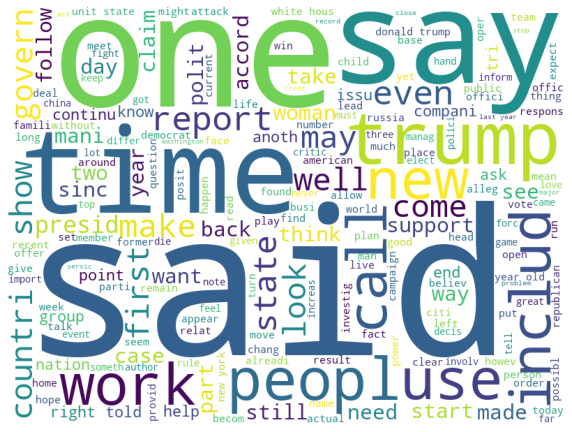

In [198]:
def wordcloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (10, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

wordcloud(' '.join(df_nela['cleaned']))

**LDA**

In [199]:
from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary

def topics(tokenized_words):
    global lda_model
    d = Dictionary([tokenized_words])
    c = [d.doc2bow(tokenized_words)]
    lda_model = LdaModel(c, num_topics=1, id2word=d)
    return list(lda_model.print_topics(num_topics=1, num_words=5))

In [200]:
df_nela['splitList'] = df_nela['cleaned'].str.split(' ')

In [201]:
df_nela['topics'] = df_nela['splitList'].apply(topics)

In [203]:
df_nela.topics[15]

[(0,
  '0.045*"googl" + 0.016*"compani" + 0.012*"blacklist" + 0.011*"leak" + 0.011*"govern"')]

**Remove weights from the topics.**

In [204]:
def cleanTopics(topics):
  out =[]
  words = topics[0][1].split( '+' )
  for word in words:
    out.append(word.split('*')[1].replace('"',''))
  return out

In [205]:
df_nela['topicsList'] = df_nela['topics'].apply(cleanTopics)

In [206]:
df_nela.head()

Unnamed: 0        date         source  \
0  0           2018-07-19  Activist Post   
1  1           2018-04-27  Activist Post   
2  2           2018-09-26  Activist Post   
3  3           2018-04-22  Activist Post   
4  4           2018-10-29  Activist Post   

                                                                                               name  \
0  As Americans Argue Over Russia US Govt Quietly Allows Dark Money Groups to Keep Donors Secret      
1  The Blowback Against Facebook Google and Amazon Is Just Beginning                                  
2  Is There A Gotcha Society The Brett Kavanaugh Debacle                                              
3  Environmentalists Who Ignore Sources of Electrical Pollution Electrosmog Are Part of the Problem   
4  In Wake of Synagogue Shooting Alt Media Purge Continues With Removal of Gab Social Network         

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [207]:
df_nela['listoftopics'] = df_nela['topicsList'].apply(' '.join)

In [208]:
#df_nela.to_csv('/content/drive/MyDrive/ML-Spring-2022/DataMarvels/Alternus_Veras/Jithesh_Alternus_Vera/df_lda.csv', encoding='utf-8')

**Word2Vector**

In [212]:
df_nela=pd.read_csv('/content/drive/MyDrive/ML-Spring-2022/DataMarvels/Alternus_Veras/Jithesh_Alternus_Vera/df_lda.csv')

In [213]:
df_nela.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [215]:
data_words = []

for news in str(df_nela['cleaned']):
  data_words.append(news.split())

In [216]:
len(data_words)

38498

In [217]:
nela_w2v = word2vec.Word2Vec(data_words, workers= 4, size=400, min_count=4, window=10, sample=0.001)

nela_w2v.init_sims(replace=True)

**TSNE**

In [218]:
def tsne_plot(model):
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=20, n_components=2, init='pca', n_iter=250, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(10, 8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

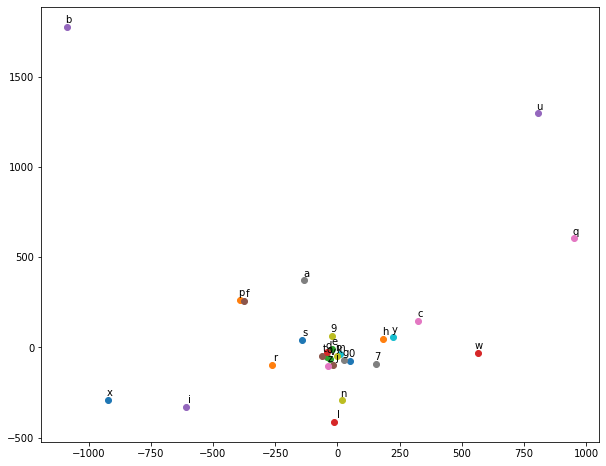

In [219]:
tsne_plot(nela_w2v)